В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

## Часть 1. Numpy

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [2]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return round(weights @ marks)

In [3]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [4]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [5]:
def change_array(array: np.array, number: int) -> np.array:
    array[::3] = number
    return array

In [6]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

print(change_array(array, number))

[-111    5    1 -111   -3   22 -111]


In [7]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [8]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [9]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    index_array = np.array(np.where(abs(array1-array2) <= precision))
    index_array = index_array.flatten()
    return index_array

In [10]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [11]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [12]:
def block_matrix(block: np.array) -> np.array:
    block_mat = np.concatenate((block, block))
    block_mat = np.hstack((block_mat, block_mat))
    return block_mat

In [13]:
block = np.array([[1, 3, 3], [7, 0, 0]])
block_matrix(block)

array([[1, 3, 3, 1, 3, 3],
       [7, 0, 0, 7, 0, 0],
       [1, 3, 3, 1, 3, 3],
       [7, 0, 0, 7, 0, 0]])

In [14]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [15]:
def diag_prod(matrix: np.array) -> int:
    sum_mult = np.diagonal(matrix)
    sum_mult = sum_mult[sum_mult != 0]
    return sum_mult.prod()

In [16]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [17]:
def normalize(matrix: np.array) -> np.array:
    rows, columns = matrix.shape
    column_means = matrix.mean(0)
    column_stds = matrix.std(0)
    column_stds[column_stds == 0] = 1
    that_means = np.tile(column_means, columns).reshape(columns, columns)
    that_stds = np.tile(column_stds, columns).reshape(columns, columns)
    normalized_matrix = (matrix - that_means) / that_stds
    return normalized_matrix

In [18]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [19]:
matrix = np.array([[1, 4, 4200], [1, 10, 5000], [1, 2, 1000]])
normalize(matrix)

array([[ 0.        , -0.39223227,  0.46291005],
       [ 0.        ,  1.37281295,  0.9258201 ],
       [ 0.        , -0.98058068, -1.38873015]])

In [20]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [21]:
def antiderivative(coefs: np.array) -> np.array:
    len_array = coefs.shape[0]
    raw_degrees = np.arange(0, len_array)
    degrees = raw_degrees[::-1]
    anti_degrees = degrees + 1
    anti_coefs = coefs / anti_degrees
    anti_coefs = np.append(anti_coefs, 0)
    return anti_coefs

In [22]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [23]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [24]:
def make_symmetric(matrix: np.array) -> np.array:
    copy_matrix = matrix.copy()
    transp_matrix = np.transpose(copy_matrix)
    np.fill_diagonal(transp_matrix, 0)
    sym_matrix = transp_matrix + matrix
    return sym_matrix

In [25]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [26]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [27]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    row = np.arange(a, b + 1)
    zero_matrix = np.zeros((m, 1))
    matrix = zero_matrix + row # broadcasting
    return matrix

In [28]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [29]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [30]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    scalar_product = vec1 @ vec2
    len_vec1 = np.sqrt((vec1 * vec1).sum())
    len_vec2 = np.sqrt((vec2 * vec2).sum())
    cos_sim = scalar_product / (len_vec1 * len_vec2)
    return cos_sim

In [31]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [32]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [34]:
import pandas as pd

In [35]:
titanic = pd.read_csv("C:/Users/kiril/OneDrive/Рабочий стол/Учеба/Предметы/ИАД/Третий модуль. Введение в анализ данных/домашка/1/train.csv")

In [36]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

- PassengerId - порядковый
- Survived - булевый
- Pclass - категориальный
- Name - категориальный
- Sex - категориальный (бинарный)
- Age - дискретный вещественный
- SibSp - дискретный вещественный
- Parch - дискретный вещественный
- Ticket - категориальный
- Fare - непрерывный вещественный
- Cabin - категориальный
- Embarked - категориальный

Задачи.
- Задача регрессии: предсказать стоимость билета.
- Задача классификации: предсказать выживет или нет пассажир.
- Задача кластеризации: предсказать в каком классе будет каждый из пассажиров.

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [38]:
total_pas = titanic['PassengerId'].count()
total_saved_pas = titanic.query('Survived == 1')['PassengerId'].count()
print(f'Доля выживших после крушения пассажиров: {total_saved_pas / total_pas}')

man_saved = titanic.query('Survived == 1 and Sex == "male"')['PassengerId'].count()
print(f'Доля выживших мужчин после крушения: {man_saved / total_pas}')

print(f'Доля выживших женщин после крушения: {total_saved_pas / total_pas - man_saved / total_pas}')

Доля выживших после крушения пассажиров: 0.3838383838383838
Доля выживших мужчин после крушения: 0.122334455667789
Доля выживших женщин после крушения: 0.2615039281705948


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [39]:
titanic.pivot_table(index=['Pclass'], values=['PassengerId'], aggfunc=['count'])

,count
,PassengerId
Pclass,
1,216
2,184
3,491


В первом классе ехало 216 пассажиров, во втором классе - 184, в третьем - 491.

In [40]:
titanic.pivot_table(index=['Pclass'], columns=['Sex'], values=['PassengerId'], aggfunc=['count'])

count     
       PassengerId     
Sex         female male
Pclass                 
1               94  122
2               76  108
3              144  347

Самый многолюдный класс - 3. В этом классе больше всего было мужчин - 347.

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [41]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

- Максимальная цена билета - около 512.3
- Минимальная цена билета - 0
- Средняя цена билета - около 32.2

In [42]:
titanic.query('Embarked == "S"')['Fare'].describe()

count    644.000000
mean      27.079812
std       35.887993
min        0.000000
25%        8.050000
50%       13.000000
75%       27.900000
max      263.000000
Name: Fare, dtype: float64

- Максимальная цена билета - 263
- Минимальная цена билета - 0
- Средняя цена билета - около 27

In [43]:
import matplotlib.pyplot as plt

In [44]:
titanic['Embarked'].unique().tolist()

['S', 'C', 'Q', nan]

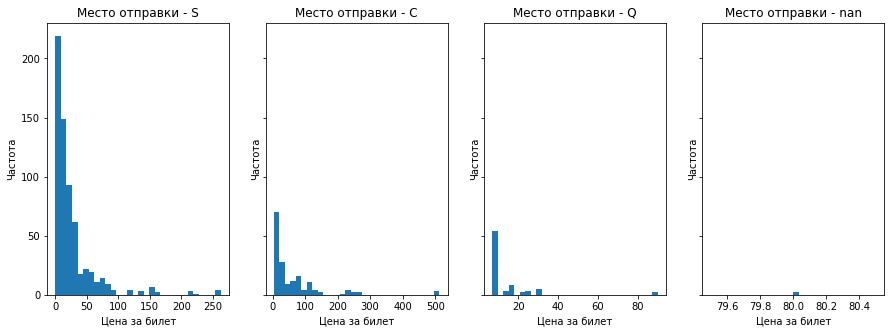

In [45]:
fig, ax = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(15, 5))
ax[0].hist(titanic.query('Embarked == "S"')['Fare'], bins=30)
ax[1].hist(titanic.query('Embarked == "C"')['Fare'], bins=30)
ax[2].hist(titanic.query('Embarked == "Q"')['Fare'], bins=30)
ax[3].hist(titanic.loc[titanic['Embarked'].isnull() == True]['Fare'], bins=30)


ax[0].set_title('Место отправки - S')
ax[1].set_title('Место отправки - C')
ax[2].set_title('Место отправки - Q')
ax[3].set_title('Место отправки - nan')

ax[0].set_xlabel('Цена за билет')
ax[0].set_ylabel('Частота')
ax[1].set_xlabel('Цена за билет')
ax[1].set_ylabel('Частота')
ax[2].set_xlabel('Цена за билет')
ax[2].set_ylabel('Частота')
ax[3].set_xlabel('Цена за билет')
ax[3].set_ylabel('Частота')

plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [46]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Столбец Ticket не несет в себе полезной информации. Билеты сами по себе уникальны, но у нас уже есть столбец PassengerId, который обладет этим свойством.

In [47]:
titanic = titanic.drop(['Ticket'], axis=1)

In [48]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,NaN,S


In [ ]:
titanic[""]

### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [49]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

В данных есть пропуски. Пропуски в столбцах: Age - 177, Cabin - 687, Embarked - 2.

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

*Age*

In [50]:
import random

In [51]:
titanic['Age'].max()

80.0

In [52]:
def age(df):
    min_age = int(titanic['Age'].min())
    max_age = int(titanic['Age'].max())
    random_age = random.randint(min_age, max_age)
    return random_age

titanic['Age'] = titanic['Age'].apply(age)

In [53]:
titanic['Age'].isnull().sum()

0

*Cabin*

In [54]:
cl_1 = titanic.loc[(titanic['Pclass'] == 1) & (titanic['Cabin'].isnull() == False)]['Cabin'].unique()
cl_2 = titanic.loc[(titanic['Pclass'] == 2) & (titanic['Cabin'].isnull() == False)]['Cabin'].unique()
cl_3 = titanic.loc[(titanic['Pclass'] == 3) & (titanic['Cabin'].isnull() == False)]['Cabin'].unique()

titanic.loc[(titanic['Pclass'] == 1) & (titanic['Cabin'].isnull() == True), 'Cabin'] = random.choices(cl_1)
titanic.loc[(titanic['Pclass'] == 2) & (titanic['Cabin'].isnull() == True), 'Cabin'] = random.choices(cl_2)
titanic.loc[(titanic['Pclass'] == 3) & (titanic['Cabin'].isnull() == True), 'Cabin'] = random.choices(cl_3)

In [55]:
titanic['Age'].isnull().sum()

0

*Embarked*

Заполним пропуски в столбце Embarked значением моды.

In [56]:
titanic.loc[titanic['Embarked'].isnull() == True, 'Embarked'] = titanic['Embarked'].mode()[0]

In [57]:
titanic['Embarked'].isnull().sum()

0

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

Корреляция цены за билет и возрастом пассажиров: -0.04477344590201017


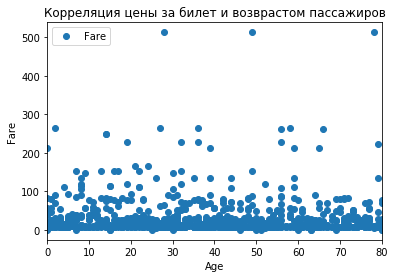

In [58]:
cor = titanic['Fare'].corr(titanic['Age'])
print(f'Корреляция цены за билет и возрастом пассажиров: {cor}')

titanic.plot(x='Age', y='Fare', style='o')
plt.title ('Корреляция цены за билет и возврастом пассажиров')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [59]:
q_3 = titanic['Fare'].describe()['75%']
print('Дорогие билеты >', q_3)

Дорогие билеты > 31.0


In [60]:
expensive_saved = titanic.query('Fare > 31 and Survived == 1').shape[0]
print(f'Количество выживших пассажиров с дорогими билетами: {expensive_saved}')

cheap_saved = titanic.query('Fare < 31 and Survived == 1').shape[0]
print(f'Количество выживших пассажиров с дешевыми билетами: {cheap_saved}')

Количество выживших пассажиров с дорогими билетами: 129
Количество выживших пассажиров с дешевыми билетами: 211


Нет, не правда. За дорогие билеты было взято число квантиля 75%. Как видим, выживших людей с дорогими билетами меньше, чем остальных.

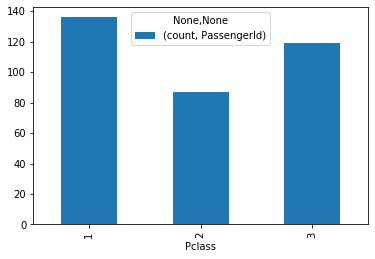

In [61]:
titanic_surv = titanic.loc[titanic['Survived'] == 1]
tit_surv_piv = titanic_surv.pivot_table(index='Pclass', values=['PassengerId'], aggfunc=['count'])
tit_surv_piv.plot(kind='bar', legend='Количество выживших')
plt.title = 'Количество выживших'
plt.legend = 'Количество выживших'
plt.show()

В первом классе больше всего выживших, на втором месте - 3 класс, на последнем - 2 класс.

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [62]:
titanic['total_family'] = 1 + titanic['SibSp'] + titanic['Parch']
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,total_family
0,1,0,3,"Braund, Mr. Owen Harris",male,70,1,0,7.2500,G6,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,17,1,0,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,50,0,0,7.9250,G6,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,59,1,0,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,28,0,0,8.0500,G6,S,1


In [63]:
titanic.loc[titanic['Age'] <= 18, 'Category_age'] = 'Teenager'
titanic.loc[(18 < titanic['Age']) & (titanic['Age'] <= 40), 'Category_age'] = 'Young'
titanic.loc[(40 < titanic['Age']) & (titanic['Age'] <= 60), 'Category_age'] = 'Middle'
titanic.loc[titanic['Age'] > 60, 'Category_age'] = 'Old'

titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,total_family,Category_age
0,1,0,3,"Braund, Mr. Owen Harris",male,70,1,0,7.2500,G6,S,2,Old
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,17,1,0,71.2833,C85,C,2,Teenager
2,3,1,3,"Heikkinen, Miss. Laina",female,50,0,0,7.9250,G6,S,1,Middle
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,59,1,0,53.1000,C123,S,2,Middle
4,5,0,3,"Allen, Mr. William Henry",male,28,0,0,8.0500,G6,S,1,Young


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

В каком Cabin находится больше всего людей?

In [75]:
titanic.groupby('Cabin')['PassengerId'].count().sort_values(ascending=False)

Cabin
G6             483
F4             170
D46             41
C23 C25 C27      4
B96 B98          4
              ... 
D15              1
D19              1
D21              1
D28              1
A10              1
Name: PassengerId, Length: 147, dtype: int64

Наибольшее значение пассажирров в G6. Очень большое число...

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

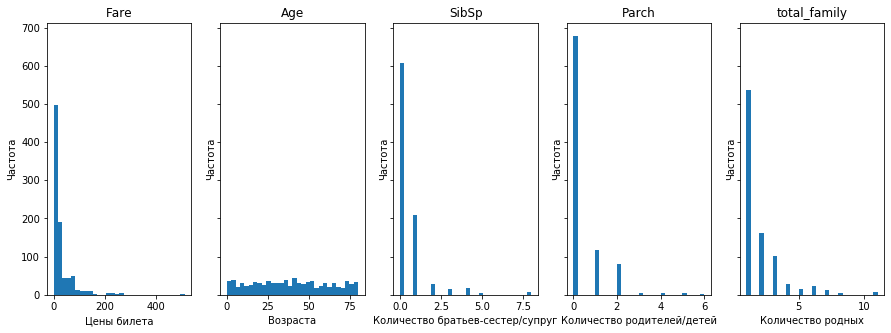

In [64]:
fig, ax = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(15, 5))
ax[0].hist(titanic['Fare'], bins=30)
ax[1].hist(titanic['Age'], bins=30)
ax[2].hist(titanic['SibSp'], bins=30)
ax[3].hist(titanic['Parch'], bins=30)
ax[4].hist(titanic['total_family'], bins=30)

ax[0].set_title('Fare')
ax[1].set_title('Age')
ax[2].set_title('SibSp')
ax[3].set_title('Parch')
ax[4].set_title('total_family')

ax[0].set_xlabel('Цены билета')
ax[0].set_ylabel('Частота')
ax[1].set_xlabel('Возраста')
ax[1].set_ylabel('Частота')
ax[2].set_xlabel('Количество братьев-сестер/супруг')
ax[2].set_ylabel('Частота')
ax[3].set_xlabel('Количество родителей/детей')
ax[3].set_ylabel('Частота')
ax[4].set_xlabel('Количество родных')
ax[4].set_ylabel('Частота')


plt.show()

Расзница между вещественными переменными сразу видна в том, что разный охват (диапазон) значений. Также какие-то переменные больше можно отнести к непрерывным (например, цена), а какие-то больше к дискретным (например, количество родных). Из-за разного масштаба переменных относительно друг друга, это может привести к тому, что при использовании их в алгоритмах машинного обучения, будут на выходе некорректные значения, придавая одним переменным больший вес, а другим меньший только из-за того, что значения отличаются по размеру, как пример.

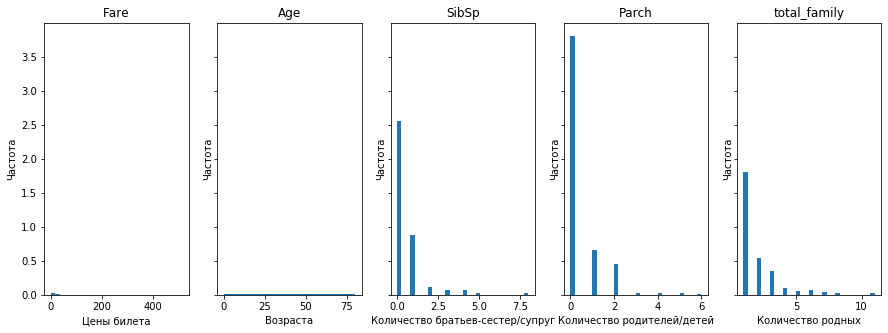

In [70]:
fig, ax = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(15, 5))
ax[0].hist(titanic['Fare'], bins=30, density=1)
ax[1].hist(titanic['Age'], bins=30, density=1)
ax[2].hist(titanic['SibSp'], bins=30, density=1)
ax[3].hist(titanic['Parch'], bins=30, density=1)
ax[4].hist(titanic['total_family'], bins=30, density=1)

ax[0].set_title('Fare')
ax[1].set_title('Age')
ax[2].set_title('SibSp')
ax[3].set_title('Parch')
ax[4].set_title('total_family')

ax[0].set_xlabel('Цены билета')
ax[0].set_ylabel('Частота')
ax[1].set_xlabel('Возраста')
ax[1].set_ylabel('Частота')
ax[2].set_xlabel('Количество братьев-сестер/супруг')
ax[2].set_ylabel('Частота')
ax[3].set_xlabel('Количество родителей/детей')
ax[3].set_ylabel('Частота')
ax[4].set_xlabel('Количество родных')
ax[4].set_ylabel('Частота')


plt.show()

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

Да, к таким признакам можно отнести: Category_age, Embarked. Нет целесообраности в том, чтобы трансформировать признак Cabin, так значений в нем много.

In [66]:
titanic = pd.concat([titanic, pd.get_dummies(titanic['Category_age'])], axis=1)
titanic = pd.concat([titanic, pd.get_dummies(titanic['Embarked'])], axis=1)

titanic.drop(['Category_age'], axis=1, inplace=True)
titanic.drop(['Embarked'], axis=1, inplace=True)

titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,total_family,Middle,Old,Teenager,Young,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,70,1,0,7.2500,G6,2,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,17,1,0,71.2833,C85,2,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,50,0,0,7.9250,G6,1,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,59,1,0,53.1000,C123,2,1,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,28,0,0,8.0500,G6,1,0,0,0,1,0,0,1


# Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию `plt.subplots`. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots`. Также полезными могут оказаться параметры `bins`, `ec`, `density` функции `plt.hist`, а также функции `set_xlabel`, `set_ylabel`, `set_title` и `plt.tight_layout`.

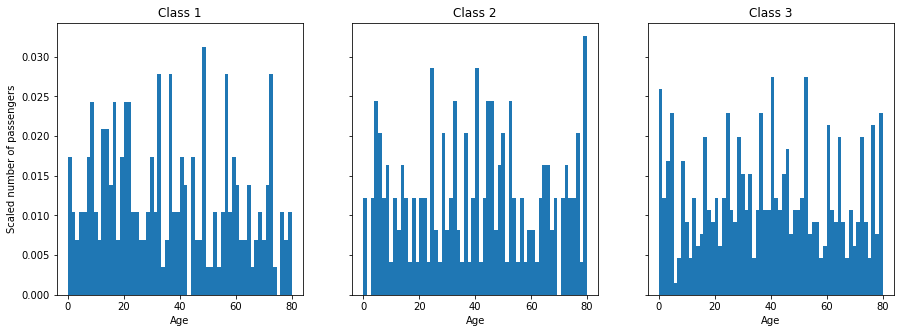

In [86]:
fig, axes = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15, 5))

axes[0].hist(titanic.query('Pclass == 1')['Age'], bins=60, density=1)
axes[0].set_title('Class 1')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Scaled number of passengers')
axes[1].hist(titanic.query('Pclass == 2')['Age'], bins=60, density=1)
axes[1].set_title('Class 2')
axes[1].set_xlabel('Age')
axes[2].hist(titanic.query('Pclass == 3')['Age'], bins=60, density=1)
axes[2].set_title('Class 3')
axes[2].set_xlabel('Age')

plt.show()

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. Также пунктирной линией изобразите график синуса для `x` на том же промежутке. Укажите на графике легенду.

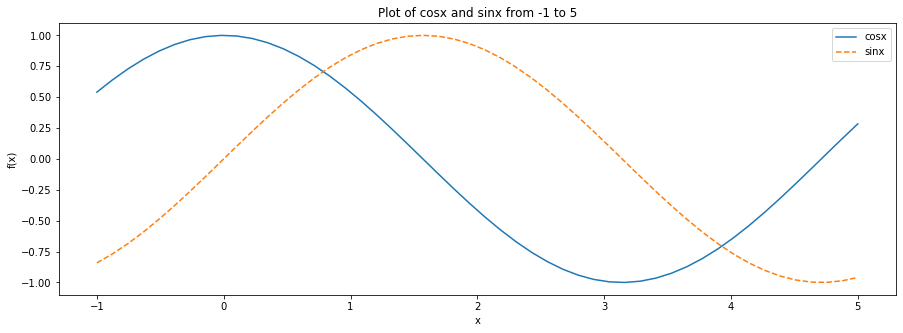

In [97]:
fig, ax = plt.subplots(sharex='col', sharey='row', figsize=(15, 5))

x = np.linspace(-1, 5)
y_sin = np.sin(x)
y_cos = np.cos(x)

ax.plot(x, y_cos, label='cosx')
ax.plot(x, y_sin, linestyle='--', label='sinx')

ax.set_title('Plot of cosx and sinx from -1 to 5')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

plt.show()

### 27

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. Обозначьте выживших и погибших пассажиров разными светами и маркерами. Также укажите на графике легенду.

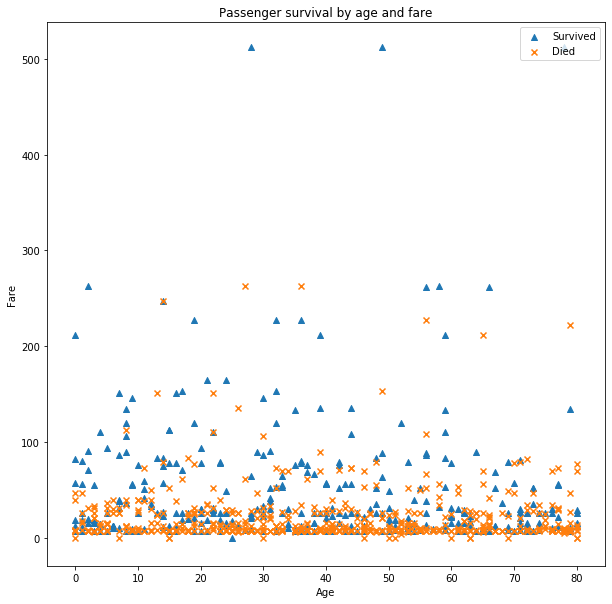

In [109]:
fig, ax = plt.subplots(sharex='col', sharey='row', figsize=(10, 10))

survived = titanic.query('Survived == 1')
died = titanic.query('Survived == 0')

ax.scatter(survived['Age'], survived['Fare'], marker='^', label='Survived')
ax.scatter(died['Age'], died['Fare'], marker='x', label='Died')

ax.legend(loc='upper right')
ax.set_title('Passenger survival by age and fare')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')

plt.show()